# Animaciones de Curvas en Superficies

En éste cuaderno desarrollamos un método sencillo para graficar una curva parametrizada sobre una superficie. La parametrización se debe dar como:
$$\alpha = (x(t), y(t))$$
La curva se mapeará a la superficie con una función $f(x,y)$, por lo que la curva sobre la superficie será descrita como $f(\alpha)$

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Dominio de la curva:
t = np.arange(0,20,0.2)

# Imagen de la curva:
x = t*(np.cos(t))
y = t*(np.sin(t))

# La imagen de la curva plana será el dominio de la curva sobre la superficie.
def f(x, y):
    z = x**2 + y**2
    return z

In [3]:
def comet3(x, y, f, rang):
    # https://gist.github.com/neale/e32b1f16a43bfdc0608f45a504df5a84
    # https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
    # https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation
    # ANIMATION FUNCTION
    z = f(x,y)
    def func(num, dataSet, line):
         # NOTE: there is no .set_data() for 3 dim data...
         line.set_data(dataSet[0:2, :num])    
         line.set_3d_properties(dataSet[2, :num])
         return line
    
    dataSet = np.array([x, y, z])
    numDataPoints = len(t)
      
    # GET SOME MATPLOTLIB OBJECTS
    fig = plt.figure()
    ax = Axes3D(fig)
        
    # NOTE: Can't pass empty arrays into 3d version of plot()
    line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
    # AXES PROPERTIES]
    # ax.set_xlim3d([limit0, limit1])
        
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('Comet Plot')
    # Creating the Animation object
         
    line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=50, blit=False)
    t2 = np.unique(np.sort(np.append(t,-t)))
    x2 = np.outer(t2, np.ones(len(t2)) )
    y2 = x2.copy().T # transpose
    z2 = f(x2,y2)
    
    ax.plot_wireframe(x2, y2, z2, alpha=0.25)
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

    #line_ani.save("Pictures/paraboloid_plot.mp4", writer=writer)
    plt.show()

<IPython.core.display.Javascript object>


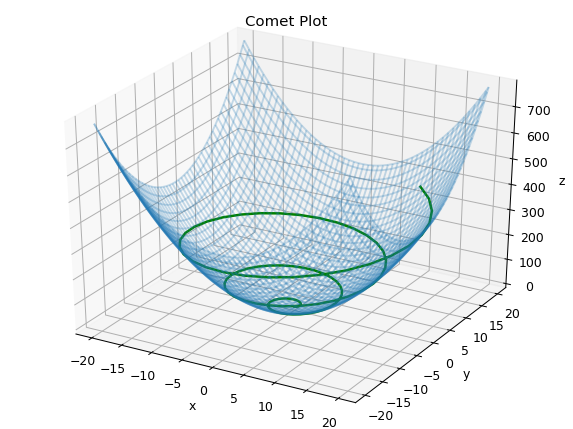

In [4]:
comet3(x,y,f,t)